# DrivenData Multimodal Simple Model

https://www.drivendata.co/blog/hateful-memes-benchmark/

DrivenData special path pandas_path:

# Dependancies and librairies used

In [ ]:
pip install pandas-path

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%matplotlib inline
import sys
import os
import json
import logging
from pathlib import Path
import random
import tarfile
import tempfile
import warnings
import pandas_path  # Path style access for pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
from pandas_path import path

In [ ]:
import torch                    
import torchvision
import fasttext
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

In [ ]:
import pytorch_lightning as pl

In [ ]:
conda install pytorch torchvision -c pytorch

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.5.30  |       ha878542_0         136 KB  conda-forge
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    conda-4.10.3               |   py37h89c1867_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following packages will be UPDATED:

  ca-certificates                      2020.12.5-ha878542_0 --> 2021.5.30-ha878542_0
  certifi                          2020.12.5-py37h89c1867_1 --> 2021.5.30-py37h89c1867_0
  conda                               4.10.1-py37h89c1867_0 --> 4.10.3-py37h89c1867_0



conda-4.10.3         | 3.1 MB    | ##########

In [ ]:
conda install pytorch-lightning -c conda-forge

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pytorch-lightning


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.13.0             |     pyhd8ed1ab_0          97 KB  conda-forge
    fsspec-2021.6.1            |     pyhd8ed1ab_0          79 KB  conda-forge
    future-0.18.2              |   py37h89c1867_3         714 KB  conda-forge
    google-auth-oauthlib-0.4.1 |             py_2          18 KB  conda-forge
    pydeprecate-0.3.0          |     pyhd8ed1ab_0          13 KB  conda-forge
    pytorch-lightning-1.3.8    |     pyhd8ed1ab_0         265 KB  conda-forge
    tensorboard-2.4.1          |     pyhd8ed1ab_0         8.8 MB  conda-forge
    tensorboard-plugin-wit-1.8.0|     pyh44b312d_0         670 KB  conda-forge
    torchmetrics-0.4.1         |     pyhd8ed1ab_0          92 KB  conda-forge
    werkzeug-2.0.1 

In [ ]:
conda install pytorch torchvision cudatoolkit=10.1 -c pytorch-nightly -c defaults -c conda-forge

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - cudatoolkit=10.1
    - pytorch
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.7.5   |       h06a4308_1         113 KB
    certifi-2021.5.30          |   py37h06a4308_0         139 KB
    conda-4.10.3               |   py37h06a4308_0         2.9 MB
    cudatoolkit-10.1.243       |       h6bb024c_0       347.4 MB
    cudf-0.16.0                |cuda_10.1_py37_g2b8298f566_0        84.7 MB  rapidsai
    cudnn-7.6.5                |       cuda10.1_0       179.9 MB
    cuml-0.16.0                |cuda10.1_py37_gbbe737348_0        61.6 MB  rapidsai
   

In [ ]:
conda install -c anaconda cudatoolkit

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - cudatoolkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py37_0         159 KB  anaconda
    cudatoolkit-10.1.243       |       h6bb024c_0       513.2 MB  anaconda
    ------------------------------------------------------------
                                           Total:       513.5 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2021.7.5-h~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            pkgs/main::certifi-2021.5.30-py37h06a~ --> anaconda::certifi-2020.6.20-py37_0
  conda              pkgs/main::conda-4.10.3-py37h06a4308_0 --> conda-forge::conda-4.10.3-py37h89

In [ ]:
pip install pytorch_lightning==0.9.0

     |████████████████████████████████| 408 kB 834 kB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 3.6 MB/s eta 0:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 1.3.8
    Uninstalling pytorch-lightning-1.3.8:
      Successfully uninstalled pytorch-lightning-1.3.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires tensorboard~=2.4, but you have tensorboard 2.2.0 which is incompatible.
tensorflow-cloud 0.1.13 requires tensorboard>=2.3.0, but you have tensorboard 2.2.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


# Setting up the dataset distribution

In [ ]:
data_dir =  Path.cwd().parent/"input/hmdatasetnp/data/"

In [ ]:
img_tar_path = data_dir/"img"
train_path = data_dir / "train.jsonl"
dev_path = data_dir / "dev_seen.jsonl"
test_path = data_dir / "test_seen.jsonl"
testLabel_path = Path.cwd().parent/"input/labelshmctestset/test_seen_label.jsonl"

In [ ]:
files = os.listdir(img_tar_path)
print(files)

['67419.png', '52691.png', '37825.png', '02578.png', '06781.png', '18054.png', '49075.png', '73516.png', '14260.png', '84059.png', '91753.png', '68472.png', '04915.png', '91654.png', '47982.png', '71083.png', '86052.png', '73045.png', '30478.png', '47938.png', '95476.png', '89465.png', '20634.png', '53260.png', '50738.png', '89754.png', '36095.png', '85410.png', '28759.png', '51094.png', '49613.png', '70942.png', '35708.png', '52140.png', '23018.png', '12867.png', '72461.png', '13570.png', '42851.png', '27410.png', '75023.png', '86059.png', '37891.png', '29475.png', '70231.png', '84903.png', '46075.png', '12684.png', '53962.png', '78054.png', '93016.png', '68254.png', '71380.png', '71954.png', '94078.png', '24751.png', '46271.png', '12956.png', '45182.png', '26910.png', '06852.png', '68137.png', '87936.png', '47208.png', '78296.png', '38195.png', '78542.png', '07968.png', '45687.png', '65892.png', '08725.png', '68549.png', '52603.png', '86725.png', '87406.png', '63547.png', '95863.png'

In [ ]:
valid = pd.read_json(test_path, lines=True)
valid.head()

,id,img,text
0,16395,img/16395.png,handjobs sold seperately
1,37405,img/37405.png,introducing fidget spinner for women
2,94180,img/94180.png,happy pride month let's go beat up lesbians
3,54321,img/54321.png,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,finds out those 72 virgins.. are goats


In [ ]:
valid = pd.read_json(testLabel_path, lines=True)
valid.head()

,id,img,label,text
0,16395,img/16395.png,1,handjobs sold seperately
1,37405,img/37405.png,1,introducing fidget spinner for women
2,94180,img/94180.png,1,happy pride month let's go beat up lesbians
3,54321,img/54321.png,1,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,1,finds out those 72 virgins.. are goats


 Let's extract the images :

In [ ]:
if not (data_dir / "img").exists():
    with tarfile.open(img_tar_path) as tf:
        tf.extractall(data_dir)

Visualise the train json file :

In [ ]:
train_samples_frame = pd.read_json(train_path, lines=True)
train_samples_frame.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


The classes are not balanced:

In [ ]:
train_samples_frame.label.value_counts()

0    5481
1    3019
Name: label, dtype: int64

Number of words in Meme text : 

In [ ]:
train_samples_frame.text.map(
    lambda text: len(text.split(" "))
).describe()

count    8500.000000
mean       11.748706
std         6.877880
min         1.000000
25%         7.000000
50%        10.000000
75%        15.000000
max        70.000000
Name: text, dtype: float64

# Explore data

In [ ]:
from PIL import Image

Resize and visualise Memes images with Pillow and TorchVision :

In [ ]:
images = [
    Image.open(
        data_dir / train_samples_frame.loc[i, "img"]
    ).convert("RGB")
    for i in range(5)
]

for image in images:
    print(image.size)

(265, 400)
(800, 533)
(558, 800)
(693, 800)
(550, 416)


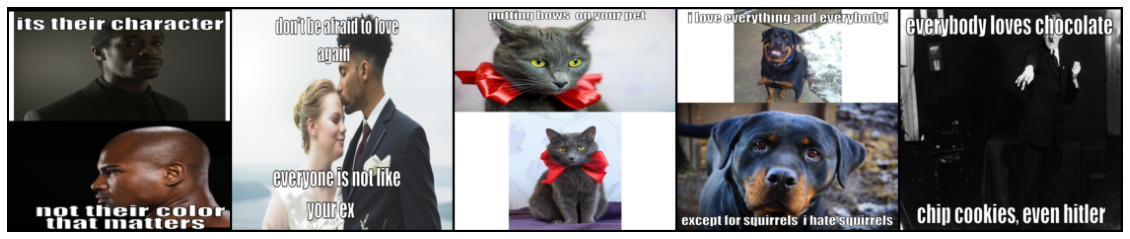

In [ ]:
# define a callable image_transform with Compose
image_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(size=(224, 224)),
        torchvision.transforms.ToTensor()
    ]
)

# convert the images and prepare for visualization.
tensor_img = torch.stack(
    [image_transform(image) for image in images]
)
grid = torchvision.utils.make_grid(tensor_img)

# plot
plt.rcParams["figure.figsize"] = (20, 5)
plt.axis('off')
_ = plt.imshow(grid.permute(1, 2, 0))

# BUILDING A MULTIMODAL MODEL

> # Preprocessing the Multimodal Dataset

In [ ]:
class HatefulMemesDataset(torch.utils.data.Dataset):
    """Uses jsonl data to preprocess and serve 
    dictionary of multimodal tensors for model input.
    """

    def __init__(
        self,
        data_path,
        img_dir,
        image_transform,
        text_transform,
        balance=False,
        dev_limit=None,
        random_state=0,
    ):

        self.samples_frame = pd.read_json(
            data_path, lines=True
        )
        self.dev_limit = dev_limit
        if balance:
            neg = self.samples_frame[
                self.samples_frame.label.eq(0)
            ]
            pos = self.samples_frame[
                self.samples_frame.label.eq(1)
            ]
            self.samples_frame = pd.concat(
                [
                    neg.sample(
                        pos.shape[0], 
                        random_state=random_state
                    ), 
                    pos
                ]
            )
        if self.dev_limit:
            if self.samples_frame.shape[0] > self.dev_limit:
                self.samples_frame = self.samples_frame.sample(
                    dev_limit, random_state=random_state
                )
        self.samples_frame = self.samples_frame.reset_index(
            drop=True
        )
        self.samples_frame.img = self.samples_frame.apply(
            lambda row: (img_dir / row.img), axis=1
        )

        if not self.samples_frame.img.path.exists().all():
            raise FileNotFoundError
        if not self.samples_frame.img.path.is_file().all():
            raise TypeError
            
        self.image_transform = image_transform
        self.text_transform = text_transform

    def __len__(self):
        """This method is called when you do len(instance) 
        for an instance of this class.
        """
        return len(self.samples_frame)

    def __getitem__(self, idx):
        """This method is called when you do instance[key] 
        for an instance of this class.
        """
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_id = self.samples_frame.loc[idx, "id"]

        image = Image.open(
            self.samples_frame.loc[idx, "img"]
        ).convert("RGB")
        image = self.image_transform(image)

        text = torch.Tensor(
            self.text_transform.get_sentence_vector(
                self.samples_frame.loc[idx, "text"]
            )
        ).squeeze()

        if "label" in self.samples_frame.columns:
            label = torch.Tensor(
                [self.samples_frame.loc[idx, "label"]]
            ).long().squeeze()
            sample = {
                "id": img_id, 
                "image": image, 
                "text": text, 
                "label": label
            }
        else:
            sample = {
                "id": img_id, 
                "image": image, 
                "text": text
            }

        return sample

# CREATING A MULTIMODAL MODEL

In [ ]:
class LanguageAndVisionConcat(torch.nn.Module):
    def __init__(
        self,
        num_classes,
        loss_fn,
        language_module,
        vision_module,
        language_feature_dim,
        vision_feature_dim,
        fusion_output_size,
        dropout_p,
        
    ):
        super(LanguageAndVisionConcat, self).__init__()
        self.language_module = language_module
        self.vision_module = vision_module
        self.fusion = torch.nn.Linear(
            in_features=(language_feature_dim + vision_feature_dim), 
            out_features=fusion_output_size
        )
        self.fc = torch.nn.Linear(
            in_features=fusion_output_size, 
            out_features=num_classes
        )
        self.loss_fn = loss_fn
        self.dropout = torch.nn.Dropout(dropout_p)
        
    def forward(self, text, image, label=None):
        text_features = torch.nn.functional.relu(
            self.language_module(text)
        )
        image_features = torch.nn.functional.relu(
            self.vision_module(image)
        )
        combined = torch.cat(
            [text_features, image_features], dim=1
        )
        fused = self.dropout(
            torch.nn.functional.relu(
            self.fusion(combined)
            )
        )
        logits = self.fc(fused)
        pred = torch.nn.functional.softmax(logits)
        loss = (
            self.loss_fn(pred, label) 
            if label is not None else label
        )
        return (pred, loss)

TRAINING THE MULTIMODAL MODEL

In [ ]:
import torch
print(torch.__version__)

1.7.0


In [ ]:
# for the purposes of this post, we'll filter
# much of the lovely logging info from our LightningModule
warnings.filterwarnings("ignore")
logging.getLogger().setLevel(logging.WARNING)


class HatefulMemesModel(pl.LightningModule):
    def __init__(self, hparams):
        for data_key in ["train_path", "dev_path", "img_dir",]:
            # ok, there's one for-loop but it doesn't count
            if data_key not in hparams.keys():
                raise KeyError(
                    f"{data_key} is a required hparam in this model"
                )
        
        super(HatefulMemesModel, self).__init__()
        self.hparams = hparams
        
        # assign some hparams that get used in multiple places
        self.embedding_dim = self.hparams.get("embedding_dim", 300)
        self.language_feature_dim = self.hparams.get(
            "language_feature_dim", 300
        )
        self.vision_feature_dim = self.hparams.get(
            # balance language and vision features by default
            "vision_feature_dim", self.language_feature_dim
        )
        self.output_path = Path(
            self.hparams.get("output_path", "model-outputs")
        )
        self.output_path.mkdir(exist_ok=True)
        
        # instantiate transforms, datasets
        self.text_transform = self._build_text_transform()
        self.image_transform = self._build_image_transform()
        self.train_dataset = self._build_dataset("train_path")
        self.dev_dataset = self._build_dataset("dev_path")
        
        # set up model and training
        self.model = self._build_model()
        self.trainer_params = self._get_trainer_params()
    
    ## Required LightningModule Methods (when validating) ##
    
    def forward(self, text, image, label=None):
        return self.model(text, image, label)

    def training_step(self, batch, batch_nb):
        preds, loss = self.forward(
            text=batch["text"], 
            image=batch["image"], 
            label=batch["label"]
        )
        
        return {"loss": loss}

    def validation_step(self, batch, batch_nb):
        preds, loss = self.eval().forward(
            text=batch["text"], 
            image=batch["image"], 
            label=batch["label"]
        )
        
        return {"batch_val_loss": loss}

    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack(
            tuple(
                output["batch_val_loss"] 
                for output in outputs
            )
        ).mean()
        
        return {
            "val_loss": avg_loss,
            "progress_bar":{"avg_val_loss": avg_loss}
        }

    def configure_optimizers(self):
        optimizers = [
            torch.optim.AdamW(
                self.model.parameters(), 
                lr=self.hparams.get("lr", 0.001)
            )
        ]
        return optimizers
    
    def train_dataloader(self):
        return torch.utils.data.DataLoader(
            self.train_dataset, 
            shuffle=True, 
            batch_size=self.hparams.get("batch_size", 4), 
            num_workers=self.hparams.get("num_workers", 16)
        )

    def val_dataloader(self):
        return torch.utils.data.DataLoader(
            self.dev_dataset, 
            shuffle=False, 
            batch_size=self.hparams.get("batch_size", 4), 
            num_workers=self.hparams.get("num_workers", 16)
        )
    
    ## Convenience Methods ##
    
    def fit(self):
        self._set_seed(self.hparams.get("random_state", 42))
        self.trainer = pl.Trainer(**self.trainer_params)
        self.trainer.fit(self)
        
    def _set_seed(self, seed):
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        if torch.cuda.is_available():
            torch.cuda.manual_seed_all(seed)

    def _build_text_transform(self):
        with tempfile.NamedTemporaryFile() as ft_training_data:
            ft_path = Path(ft_training_data.name)
            with ft_path.open("w") as ft:
                training_data = [
                    json.loads(line)["text"] + "/n" 
                    for line in open(
                        self.hparams.get("train_path")
                    ).read().splitlines()
                ]
                for line in training_data:
                    ft.write(line + "\n")
                language_transform = fasttext.train_unsupervised(
                    str(ft_path),
                    model=self.hparams.get("fasttext_model", "cbow"),
                    dim=self.embedding_dim
                    
                    
                )
        return language_transform
    
    def _build_image_transform(self):
        image_dim = self.hparams.get("image_dim", 224)
        image_transform = torchvision.transforms.Compose(
            [
                torchvision.transforms.Resize(
                    size=(image_dim, image_dim)
                ),        
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize(
                    mean=(0.485, 0.456, 0.406), 
                    std=(0.229, 0.224, 0.225)
                ),
            ]
        )
        return image_transform

    def _build_dataset(self, dataset_key):
        return HatefulMemesDataset(
            data_path=self.hparams.get(dataset_key, dataset_key),
            img_dir=self.hparams.get("img_dir"),
            image_transform=self.image_transform,
            text_transform=self.text_transform,
            # limit training samples only
            dev_limit=(
                self.hparams.get("dev_limit", None) 
                if "train" in str(dataset_key) else None
            ),
            balance=True if "train" in str(dataset_key) else False,
        )
    
    def _build_model(self):
        # we're going to pass the outputs of our text
        # transform through an additional trainable layer
        # rather than fine-tuning the transform
        language_module = torch.nn.Linear(
                in_features=self.embedding_dim,
                out_features=self.language_feature_dim
        )
        
        # easiest way to get features rather than
        # classification is to overwrite last layer
        # with an identity transformation, we'll reduce
        # dimension using a Linear layer, resnet is 2048 out
        vision_module = torchvision.models.resnet152(
            pretrained=True
        )
        vision_module.fc = torch.nn.Linear(
                in_features=2048,
                out_features=self.vision_feature_dim
        )

        return LanguageAndVisionConcat(
            num_classes=self.hparams.get("num_classes", 2),
            loss_fn=torch.nn.CrossEntropyLoss(),
            language_module=language_module,
            vision_module=vision_module,
            language_feature_dim=self.language_feature_dim,
            vision_feature_dim=self.vision_feature_dim,
            fusion_output_size=self.hparams.get(
                "fusion_output_size", 512
            ),
            dropout_p=self.hparams.get("dropout_p", 0.1),
        )
    
    def _get_trainer_params(self):
        checkpoint_callback = pl.callbacks.ModelCheckpoint(
            dirpath=self.output_path,
            monitor=self.hparams.get(
                "checkpoint_monitor", "avg_val_loss"
            ),
            mode=self.hparams.get(
                "checkpoint_monitor_mode", "min"
            ),
            verbose=self.hparams.get("verbose", True)
        )

        early_stop_callback = pl.callbacks.EarlyStopping(
            monitor=self.hparams.get(
                "early_stop_monitor", "avg_val_loss"
            ),
            min_delta=self.hparams.get(
                "early_stop_min_delta", 0.001
            ),
            patience=self.hparams.get(
                "early_stop_patience", 3
            ),
            verbose=self.hparams.get("verbose", True),
        )

        trainer_params = {
            "checkpoint_callback": checkpoint_callback,
            "default_root_dir": self.output_path,
            "accumulate_grad_batches": self.hparams.get(
                "accumulate_grad_batches", 1
            ),
            "gpus": self.hparams.get("n_gpu", 1),
            "max_epochs": self.hparams.get("max_epochs", 100),
            "gradient_clip_val": self.hparams.get(
                "gradient_clip_value", 1
            ),
        }
        return trainer_params
            
    @torch.no_grad()
    def make_submission_frame(self, test_path):
        test_dataset = self._build_dataset(test_path)
        submission_frame = pd.DataFrame(
            index=test_dataset.samples_frame.id,
            columns=["proba", "label"]
        )
        test_dataloader = torch.utils.data.DataLoader(
            test_dataset, 
            shuffle=False, 
            batch_size=self.hparams.get("batch_size", 4), 
            num_workers=self.hparams.get("num_workers", 16))
        for batch in tqdm(test_dataloader, total=len(test_dataloader)):
            preds, _ = self.model.eval().to("cpu")(
                batch["text"], batch["image"]
            )
            submission_frame.loc[batch["id"], "proba"] = preds[:, 1]
            submission_frame.loc[batch["id"], "label"] = preds.argmax(dim=1)
        submission_frame.proba = submission_frame.proba.astype(float)
        submission_frame.label = submission_frame.label.astype(int)
        return submission_frame

In [ ]:
print("[DataDir]: ", data_dir)
print("[TrainDir]: ", train_path)
print("[DevDir]: ", dev_path)

[DataDir]:  /kaggle/input/hmdatasetnp/data
[TrainDir]:  /kaggle/input/hmdatasetnp/data/train.jsonl
[DevDir]:  /kaggle/input/hmdatasetnp/data/dev_seen.jsonl


# FIT THE MODEL

In [ ]:
#past code

hparams = {
    
    # Required hparams
    "train_path": train_path,
    "dev_path": dev_path,
    "img_dir": data_dir,
    
    # Optional hparams
    "embedding_dim": 150,
    "language_feature_dim": 300,
    "vision_feature_dim": 300,
    "fusion_output_size": 256,
    "output_path": "model-outputs",
    "dev_limit": None,
    "lr": 0.00005,
    "max_epochs": 10,
    "n_gpu": 1,
    "batch_size": 4,
    # allows us to "simulate" having larger batches 
    "accumulate_grad_batches": 16,
    "early_stop_patience": 3,
}

hateful_memes_model = HatefulMemesModel(hparams=hparams)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

In [ ]:
hateful_memes_model.fit()

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
submission = hateful_memes_model.make_submission_frame(test_path)
submission.head()

100%|██████████| 250/250 [04:38<00:00,  1.11s/it]


,proba,label
id,,
16395,0.949035,1
37405,0.790196,1
94180,0.689591,1
54321,0.698236,1
97015,0.993769,1


In [ ]:
#getting the Submision CVS
submission.to_csv(("model-outputs/submission.csv"), index=True)

In [ ]:
#storing submition labels:
submission_labels = submission.label
submission_labels

id
16395    1
37405    1
94180    1
54321    1
97015    1
        ..
3869     0
23817    0
56280    1
29384    0
34127    1
Name: label, Length: 1000, dtype: int64

In [ ]:
#storing prob
submission_prob = submission.proba
submission_prob

id
16395    0.949035
37405    0.790196
94180    0.689591
54321    0.698236
97015    0.993769
           ...   
3869     0.000301
23817    0.000613
56280    0.995270
29384    0.020082
34127    0.510685
Name: proba, Length: 1000, dtype: float64

In [ ]:
#cheking we have the test set labels
valid.head()

,id,img,label,text
0,16395,img/16395.png,1,handjobs sold seperately
1,37405,img/37405.png,1,introducing fidget spinner for women
2,94180,img/94180.png,1,happy pride month let's go beat up lesbians
3,54321,img/54321.png,1,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,1,finds out those 72 virgins.. are goats


In [ ]:
#storing the test set label
test_label = valid.label
test_label

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: label, Length: 1000, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

Checking AUC Roc metric

In [ ]:
#cheking accuracy 
print("AUC: ", roc_auc_score(test_label, submission_labels))

AUC:  0.535734293717487




```
# This is formatted as code
```

Our AUC Roc accuracy is 53%

Inspecting results: Confusion Matrix

In [ ]:
confusion_matrix(test_label, submission_labels)

array([[331, 179],
       [283, 207]])

Text(159.0, 0.5, 'Actual sentiment')

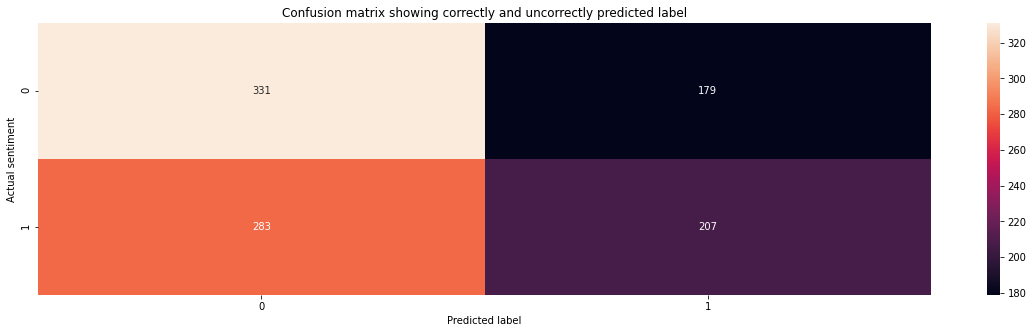

In [ ]:
cf_matrix = confusion_matrix(test_label, submission_labels)

plt.title('Confusion matrix showing correctly and uncorrectly predicted label')
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('Actual sentiment')

# Going futher in analysis

Want to check what image has the image has the highest none true/flase - neg/pos

In [ ]:
#getting CVS
sub_path = "./model-outputs/submission.csv"
submission_cvs = pd.read_csv(sub_path)

#or import the cvs from your computer, put in dataset and work directly on it

In [ ]:
# Predicted Labels
predicted_labels = {submission_cvs['id'][i]:submission_cvs['label'][i] for i in range(500)}

In [ ]:
predicted_labels

{16395: 1,
 37405: 1,
 94180: 1,
 54321: 1,
 97015: 1,
 73506: 0,
 5429: 1,
 70691: 0,
 69421: 0,
 50162: 0,
 43728: 0,
 75081: 1,
 47829: 0,
 35279: 0,
 54920: 0,
 39867: 0,
 96082: 1,
 38045: 0,
 62134: 1,
 81970: 1,
 1865: 1,
 86139: 1,
 38765: 1,
 15306: 1,
 17209: 0,
 96185: 1,
 93875: 0,
 57286: 1,
 8261: 0,
 60823: 0,
 83720: 0,
 89432: 0,
 89607: 0,
 14267: 1,
 82749: 1,
 70643: 0,
 12785: 0,
 86394: 0,
 63491: 0,
 98026: 0,
 89263: 0,
 42975: 1,
 74016: 0,
 26347: 1,
 89105: 1,
 57932: 0,
 52971: 0,
 4615: 0,
 1936: 1,
 17546: 1,
 56908: 0,
 24973: 0,
 4958: 1,
 60345: 0,
 2356: 0,
 91806: 0,
 5462: 0,
 1627: 1,
 18239: 0,
 49372: 1,
 59167: 0,
 59287: 0,
 64279: 1,
 38701: 1,
 12643: 0,
 46532: 0,
 7516: 0,
 93251: 1,
 31760: 0,
 19230: 1,
 89251: 0,
 2789: 0,
 3976: 1,
 7291: 0,
 58374: 0,
 78092: 0,
 28396: 1,
 87039: 1,
 94216: 0,
 81523: 1,
 15473: 1,
 48059: 1,
 38054: 0,
 35870: 0,
 7392: 0,
 72019: 0,
 95723: 0,
 1284: 0,
 27980: 0,
 65917: 0,
 10548: 0,
 26091: 0,
 98

In [ ]:
# Predicted Probabilities
predicted_prob = {submission_cvs['id'][i]:submission_cvs['proba'][i] for i in range(500)}

In [ ]:
predicted_prob

{16395: 0.9490346312522888,
 37405: 0.7901961803436279,
 94180: 0.6895907521247864,
 54321: 0.6982360482215881,
 97015: 0.9937686920166016,
 73506: 0.00166664260905236,
 5429: 0.9981666803359984,
 70691: 9.045030310517177e-06,
 69421: 0.0008811845909804106,
 50162: 1.6199674064409922e-05,
 43728: 8.995315147330984e-05,
 75081: 0.9994518160820008,
 47829: 0.0006095108692534268,
 35279: 5.354859604267404e-05,
 54920: 1.3922782500230824e-06,
 39867: 2.0827484092933449e-07,
 96082: 0.9712646603584291,
 38045: 0.04044266417622566,
 62134: 0.8880288004875183,
 81970: 0.8202387690544128,
 1865: 0.9735652208328248,
 86139: 0.9999992847442628,
 38765: 0.9999639987945556,
 15306: 0.9998990297317504,
 17209: 0.0004459060437511652,
 96185: 0.9266456365585328,
 93875: 0.0014939934480935335,
 57286: 0.9999935626983644,
 8261: 0.30653974413871765,
 60823: 0.0024000441189855337,
 83720: 0.0008221798343583941,
 89432: 0.031011130660772324,
 89607: 0.0007118344656191766,
 14267: 0.9304253458976746,
 827

In [ ]:
#Actual labels
actual_labels = {valid['id'][i]:valid['label'][i] for i in range(500)}

In [ ]:
actual_labels

{16395: 1,
 37405: 1,
 94180: 1,
 54321: 1,
 97015: 1,
 73506: 1,
 5429: 1,
 70691: 0,
 69421: 1,
 50162: 1,
 43728: 1,
 75081: 1,
 47829: 1,
 35279: 1,
 54920: 1,
 39867: 1,
 96082: 1,
 38045: 1,
 62134: 1,
 81970: 1,
 1865: 1,
 86139: 1,
 38765: 1,
 15306: 1,
 17209: 1,
 96185: 1,
 93875: 1,
 57286: 1,
 8261: 1,
 60823: 1,
 83720: 1,
 89432: 1,
 89607: 1,
 14267: 1,
 82749: 1,
 70643: 1,
 12785: 1,
 86394: 1,
 63491: 1,
 98026: 1,
 89263: 0,
 42975: 1,
 74016: 1,
 26347: 1,
 89105: 1,
 57932: 1,
 52971: 0,
 4615: 1,
 1936: 1,
 17546: 1,
 56908: 1,
 24973: 0,
 4958: 1,
 60345: 1,
 2356: 0,
 91806: 1,
 5462: 1,
 1627: 1,
 18239: 0,
 49372: 1,
 59167: 0,
 59287: 1,
 64279: 1,
 38701: 1,
 12643: 1,
 46532: 1,
 7516: 1,
 93251: 1,
 31760: 0,
 19230: 0,
 89251: 1,
 2789: 1,
 3976: 1,
 7291: 1,
 58374: 0,
 78092: 1,
 28396: 1,
 87039: 1,
 94216: 1,
 81523: 1,
 15473: 1,
 48059: 1,
 38054: 1,
 35870: 1,
 7392: 1,
 72019: 1,
 95723: 1,
 1284: 1,
 27980: 1,
 65917: 1,
 10548: 1,
 26091: 1,
 98